KeyboardInterrupt: 

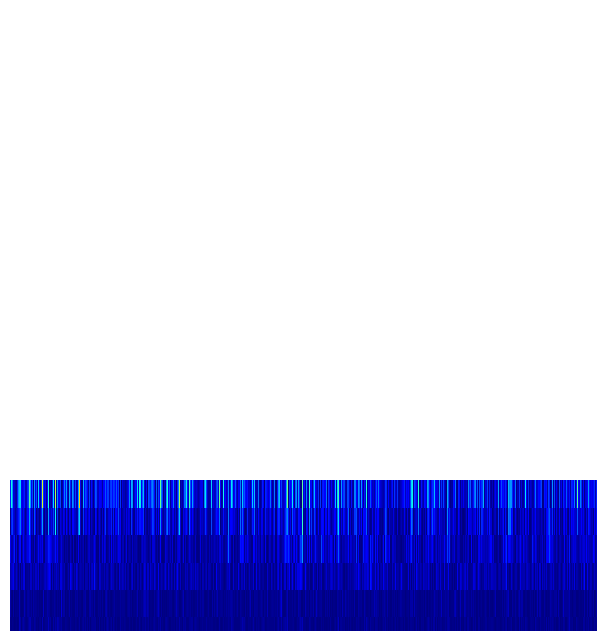

In [1]:
import numpy as np
import librosa
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pywt
# サンプルデータの読み込み
audio_path1 = "C:/研究室/実験結果/20231129/20231129/0.1mm/0.5MPa.wav"


#読み込む長さ
duration = 1
#librosaで読み込み
def load(audio_path1,start_time,duration):
    y1, sr = librosa.load(audio_path1, sr=44100, offset=start_time, duration=duration)
    return y1

#連続ウェーブレット変換_pywt
def cwt(audio_data):
    widths = np.arange(1, 30) #試すしかない
    cwtmatr, freqs = pywt.cwt(audio_data, widths, 'morl',sampling_period=2.2676e-5)
    Amplitude = np.abs(cwtmatr)
    #正規化
    Amplitude_normalized = (Amplitude - np.min(Amplitude)) / (np.max(Amplitude) - np.min(Amplitude))
    #power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)
    #print(len(freqs))
    #print(freqs)
    
    # 周波数の合計を計算
    total_frequency = np.sum(1 / freqs)

    # 結果を表示
    #print("周波数の合計:", total_frequency)
    return Amplitude_normalized
#スペクトログラム描画
def plot_spectrogram(data,save_path):
    #描画
    plt.figure(figsize=(7,7))
    librosa.display.specshow(data, y_axis='hz', x_axis='time', sr=44100, cmap='jet')
    plt.ylim(0, 100000)
    #plt.title('Power Spectrogram')
    #plt.colorbar()

    plt.tight_layout()
    plt.axis('off')
    #plt.show()
    
    plt.savefig(save_path,dpi=180.7, bbox_inches='tight',pad_inches = 0)
    plt.close()
    
file_path = "C:/研究室/test/"

for i in range(0,240,1):
    start_time = i*0.5
    y1 = load(audio_path1, start_time, duration)
    Amplitude_librosa1 = cwt(y1)
    
    # ループのインデックスを文字列に変換してファイル名に使用
    image_filename = f"1206_{str(i)}.png"
    
    # 画像を保存するパスにファイル名を結合
    save_path_with_filename = file_path + image_filename
    
    plot_spectrogram(Amplitude_librosa1, save_path_with_filename)
    

    
    if i>=240:
        break
        


    